<a href="https://colab.research.google.com/github/ridayumnahmed/Effect-ofclimate-change-on-crop-production/blob/main/IP_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/ayushanand18/climate-change-vs-agri.git

Cloning into 'climate-change-vs-agri'...
remote: Enumerating objects: 38, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 38 (delta 14), reused 26 (delta 6), pack-reused 0
Unpacking objects: 100% (38/38), done.


# Effects of climate change on agriculture

We'll be visualizing trends in food production across different countries since 1960s to 2020 to assess the impact of climate change on different food crops.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

## Introduction
(will insert some introduction here)



## Step 1: Downloading Data
We have acquired our dataset from AgroSphere (a project under NASA), let us start visualizing the data on emmissions.
We have 4 files (CSV) in the /data folder, as described:
+ countries.csv - Contains unique country codes which are used in emmissions and food production data
+ emissionAll.csv - Contains data from emissions from various sources (only agriculture.
+ FAOcrops.csv - Contains data from food productions (weight of crop in tonnes) of different countries.
+ yield.csv - Contains data from food productions (area of cultivated land in Ha) of different countries.

In [ ]:
countries = pd.DataFrame(pd.read_csv('/content/climate-change-vs-agri/data/countries.csv'))
emissionall = pd.DataFrame(pd.read_csv('/content/climate-change-vs-agri/data/emissionAll.csv'))
cropsyield = pd.DataFrame(pd.read_csv('/content/climate-change-vs-agri/data/FAOcrops.csv'))
areayield = pd.DataFrame(pd.read_csv('/content/climate-change-vs-agri/data/yield.csv'))

## Step 2: Cleaning and selecting the data
The data is very big and unclean. It contains many information that we don't need so we'll be selecting only what we need and dropping the rest.

In [ ]:
countries = countries.drop(['code2','Numeric code','lat','lon','iconCode'], axis=1)
countries.head(10)

,country,code3
0,Albania,ALB
1,Algeria,DZA
2,American Samoa,ASM
3,Andorra,AND
4,Angola,AGO
5,Anguilla,AIA
6,Antarctica,ATA
7,Antigua and Barbuda,ATG
8,Argentina,ARG
9,Armenia,ARM


So, in the previous cell we removed all label that we didn't need and now we have only two columns - the country names and the code with us. This, looks good!

In [ ]:
countryincludes = ['AFG','AUS','AUT','BGD','BRA','CHL','CHN','COG','FRA','GHA','IND','IDN','IRQ','JPN','JOR','MEX','NZL','KOR','REU','GBR','USA','VNM']
len(countryincludes)

22

This is the list of countries only which we would be focusing the project on - 22 for now. Let us find the country in our data.

In [ ]:
countries[countries.code3.isin(countryincludes)]

,country,code3
11,Australia,AUS
12,Austria,AUT
16,Bangladesh,BGD
28,Brazil,BRA
41,Chile,CHL
42,China,CHN
47,Congo,COG
71,France,FRA
79,Ghana,GHA
98,India,IND


Now let us try our hands on the areayield dataset.
Let us first know the crops (unique values) and then shall we select what we need to use in future.

In [ ]:
cropsyield.typeName.unique()

array(['Almonds, with shell Production in tonnes',
       'Anise, badian, fennel, coriander Production in tonnes',
       'Apples Production in tonnes', 'Apricots Production in tonnes',
       'Barley Production in tonnes', 'Berries nes Production in tonnes',
       'Cotton lint Production in tonnes',
       'Cottonseed Production in tonnes', 'Figs Production in tonnes',
       'Fruit, citrus nes Production in tonnes',
       'Fruit, fresh nes Production in tonnes',
       'Fruit, stone nes Production in tonnes',
       'Grapes Production in tonnes', 'Linseed Production in tonnes',
       'Maize Production in tonnes',
       'Melons, other (inc.cantaloupes) Production in tonnes',
       'Millet Production in tonnes', 'Nuts, nes Production in tonnes',
       'Olives Production in tonnes', 'Oranges Production in tonnes',
       'Peaches and nectarines Production in tonnes',
       'Pears Production in tonnes', 'Pistachios Production in tonnes',
       'Plums and sloes Production in tonne

Now that we'll select only 10 crops to move forward with (This will make our work easier). If we want more we can change them later.

In [ ]:
cropsincludes = ['Apples Production in tonnes',
                'Maize Production in tonnes',
                'Fruit, fresh nes Production in tonnes',
                'Potatoes Production in tonnes',
                'Rice, paddy Production in tonnes',
               'Vegetables Primary Production in tonnes',
               'Pulses, Total Production in tonnes',
               'Poppy seed Production in tonnes',
               'Sugar beet Production in tonnes',
               'Coffee, green Production in tonnes']
print("Total number of crops = ",len(cropsincludes))
cropsincludes

Total number of crops =  10


['Apples Production in tonnes',
 'Maize Production in tonnes',
 'Fruit, fresh nes Production in tonnes',
 'Potatoes Production in tonnes',
 'Rice, paddy Production in tonnes',
 'Vegetables Primary Production in tonnes',
 'Pulses, Total Production in tonnes',
 'Poppy seed Production in tonnes',
 'Sugar beet Production in tonnes',
 'Coffee, green Production in tonnes']

In [ ]:
selectcrops = cropsyield[cropsyield.typeName.isin(cropsincludes)].copy()
selectcrops.index = range(len(selectcrops))
selectcrops = selectcrops[selectcrops.code3.isin(countryincludes)]
## We also need to eliminate data from countries we don't need!
selectcrops

,code3,typeName,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AFG,Apples Production in tonnes,15100.0,15100.0,15100.0,18400.0,20400.0,22800.0,27600.0,27900.0,28200.0,27300.0,21500.0,26600.0,27600.0,27800.0,27900.0,26200.0,15500.0,22700.0,21600.0,22300.0,22100.0,21400.0,20800.0,20000.0,19100.0,19400.0,16600.0,16900.0,16900.0,16867.0,17255.0,17200.0,17000.0,17500.0,18547.0,20763.0,23301.0,26091.0,28287.0,32115.0,32113.0,30969.0,27303.0,16331.0,19992.0,52500.0,59500.0,57343.0,72765.0,59850.0,62041.0,70000.0,78597.0,89403.0
1,AFG,"Fruit, fresh nes Production in tonnes",71200.0,69000.0,71000.0,89000.0,98600.0,110900.0,138400.0,138400.0,140500.0,135700.0,102800.0,127500.0,134300.0,135400.0,136600.0,123464.0,65125.0,100681.0,98400.0,101430.0,103200.0,95700.0,94600.0,87706.0,82997.0,82799.0,71100.0,72530.0,76000.0,75150.0,76350.0,77000.0,79122.0,80350.0,81550.0,82640.0,85810.0,87443.0,89083.0,90919.0,93100.0,94772.0,100000.0,98630.0,100251.0,106366.0,107886.0,96000.0,126195.0,100956.0,58891.0,61995.0,63292.0,63375.0
2,AFG,Maize Production in tonnes,700000.0,700000.0,713000.0,720000.0,720000.0,720000.0,768000.0,773000.0,785000.0,667000.0,670000.0,720000.0,760000.0,770000.0,780000.0,800000.0,760000.0,780000.0,760000.0,752000.0,701000.0,663000.0,639000.0,608000.0,577000.0,567000.0,514000.0,494000.0,458000.0,480000.0,420000.0,300000.0,470000.0,500000.0,530000.0,360000.0,300000.0,330000.0,240000.0,115000.0,160000.0,298000.0,210000.0,400000.0,315000.0,359000.0,360000.0,360000.0,300000.0,301000.0,300120.0,310000.0,312000.0,316000.0
3,AFG,Potatoes Production in tonnes,130000.0,115000.0,122000.0,129000.0,132000.0,136000.0,147000.0,150000.0,154000.0,144000.0,167000.0,158000.0,165000.0,182000.0,194500.0,354000.0,200000.0,250000.0,257000.0,266000.0,273000.0,273000.0,268000.0,260000.0,248000.0,238000.0,217000.0,218000.0,203000.0,224000.0,223000.0,225000.0,227000.0,229000.0,231000.0,233000.0,235000.0,235000.0,235000.0,235000.0,235000.0,230000.0,350000.0,300000.0,300000.0,300000.0,300800.0,280000.0,302400.0,246000.0,205000.0,230000.0,302980.0,340257.0
4,AFG,"Rice, paddy Production in tonnes",319000.0,319000.0,319000.0,380000.0,380000.0,337000.0,396000.0,402000.0,407000.0,366000.0,350000.0,400000.0,420000.0,420000.0,435000.0,448000.0,400000.0,428000.0,439000.0,415000.0,390000.0,364000.0,350000.0,334000.0,317000.0,336000.0,324000.0,343000.0,320000.0,333000.0,335000.0,300000.0,300000.0,342000.0,390000.0,340000.0,400000.0,450000.0,280000.0,260000.0,242000.0,388000.0,434000.0,463000.0,485000.0,540000.0,552000.0,612000.0,645000.0,672000.0,672000.0,500000.0,512094.0,537000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,VNM,"Fruit, fresh nes Production in tonnes",860000.0,860000.0,860000.0,860000.0,925000.0,925000.0,925000.0,925000.0,910000.0,910000.0,910000.0,910000.0,880000.0,880000.0,880000.0,880000.0,960000.0,980000.0,1040000.0,1150000.0,1200000.0,1250000.0,1050000.0,1140000.0,1050000.0,1170000.0,1320000.0,1250000.0,1150000.0,1110000.0,1070000.0,1350000.0,1420000.0,1500000.0,1750000.0,1767523.0,1800000.0,1850000.0,2049958.0,2200000.0,2300000.0,2500000.0,2620000.0,2700000.0,2750000.0,2800000.0,2700000.0,2750000.0,2800000.0,2802046.0,2809600.0,2800000.0,2800000.0,2848747.0
1027,VNM,Maize Production in tonnes,292200.0,314085.0,253840.0,319600.0,319100.0,256500.0,253000.0,262000.0,271000.0,257300.0,237000.0,261700.0,300500.0,315000.0,280600.0,386800.0,403700.0,433500.0,371200.0,428800.0,429600.0,438100.0,468000.0,532200.0,587100.0,569800.0,561000.0,814850.0,837900.0,671000.0,672000.0,747900.0,882200.0,1143900.0,1177200.0,1536700.0,1650600.0,1612000.0,

**Wooho! Great so far.**

Now, we'll go forward with this new data with selected parameters. And do similiar things with areayield.

In [ ]:
areayield.typeName.unique()

array(['Almonds, with shell yield in hg/ha',
       'Anise, badian, fennel, coriander yield in hg/ha',
       'Apples yield in hg/ha', 'Apricots yield in hg/ha',
       'Barley yield in hg/ha', 'Berries nes yield in hg/ha',
       'Figs yield in hg/ha', 'Fruit, citrus nes yield in hg/ha',
       'Fruit, fresh nes yield in hg/ha',
       'Fruit, stone nes yield in hg/ha', 'Grapes yield in hg/ha',
       'Linseed yield in hg/ha', 'Maize yield in hg/ha',
       'Melons, other (inc.cantaloupes) yield in hg/ha',
       'Millet yield in hg/ha', 'Nuts, nes yield in hg/ha',
       'Olives yield in hg/ha', 'Oranges yield in hg/ha',
       'Peaches and nectarines yield in hg/ha', 'Pears yield in hg/ha',
       'Pistachios yield in hg/ha', 'Plums and sloes yield in hg/ha',
       'Potatoes yield in hg/ha', 'Pulses, nes yield in hg/ha',
       'Rice, paddy yield in hg/ha', 'Seed cotton yield in hg/ha',
       'Sesame seed yield in hg/ha', 'Sugar beet yield in hg/ha',
       'Sugar cane yield in hg

In [ ]:
areaincludes = ['Apples yield in hg/ha',
                'Maize yield in hg/ha',
                'Fruit, fresh nes yield in hg/ha',
                'Potatoes yield in hg/ha',
                'Rice, paddy yield in hg/ha',
               'Vegetables Primary yield in hg/ha',
               'Pulses, Total yield in hg/ha',
               'Poppy seed yield in hg/ha',
               'Sugar beet yield in hg/ha',
               'Coffee, green yield in hg/ha']
print("Total number of crops = ", len(areaincludes))
areaincludes

Total number of crops =  10


['Apples yield in hg/ha',
 'Maize yield in hg/ha',
 'Fruit, fresh nes yield in hg/ha',
 'Potatoes yield in hg/ha',
 'Rice, paddy yield in hg/ha',
 'Vegetables Primary yield in hg/ha',
 'Pulses, Total yield in hg/ha',
 'Poppy seed yield in hg/ha',
 'Sugar beet yield in hg/ha',
 'Coffee, green yield in hg/ha']

In [ ]:
selectarea = areayield[areayield.typeName.isin(areaincludes)]
selectarea.index = range(len(selectarea))
selectarea = selectarea[selectarea.code3.isin(countryincludes)]
selectarea

,code3,typeName,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AFG,Apples yield in hg/ha,68018.0,68018.0,68018.0,78298.0,82258.0,83212.0,90196.0,93311.0,92763.0,89216.0,70261.0,84444.0,85981.0,85015.0,85321.0,80122.0,47256.0,69846.0,68571.0,70794.0,71753.0,72297.0,72982.0,73260.0,71805.0,74903.0,74439.0,72532.0,72222.0,71319.0,74642.0,74274.0,73913.0,74468.0,74676.0,74152.0,73376.0,72473.0,71569.0,70796.0,70310.0,68648.0,69385.0,70668.0,72672.0,75000.0,85000.0,81919.0,85105.0,70000.0,70000.0,76519.0,76005.0,73000.0
1,AFG,"Fruit, fresh nes yield in hg/ha",51153.0,50109.0,52129.0,60544.0,63984.0,66607.0,71047.0,75299.0,74973.0,72606.0,55448.0,68844.0,73348.0,73071.0,74199.0,68744.0,38241.0,59550.0,62996.0,64075.0,69123.0,68260.0,72546.0,78135.0,83793.0,79883.0,94048.0,81312.0,74510.0,69135.0,70891.0,71296.0,74660.0,76361.0,78098.0,79815.0,81812.0,83601.0,85351.0,86971.0,88198.0,89932.0,90909.0,95382.0,99235.0,103347.0,107886.0,120000.0,150000.0,120000.0,70000.0,73690.0,74902.0,75000.0
2,AFG,Maize yield in hg/ha,14000.0,14000.0,14260.0,14257.0,14400.0,14400.0,14144.0,17064.0,17177.0,14757.0,13400.0,15652.0,16170.0,16170.0,16116.0,16598.0,15833.0,16183.0,16102.0,16711.0,16690.0,16658.0,16641.0,16612.0,16652.0,16875.0,17020.0,17034.0,16963.0,17582.0,16800.0,15000.0,16786.0,16667.0,16563.0,16364.0,15000.0,16500.0,15000.0,11979.0,20000.0,29800.0,8400.0,16000.0,12069.0,26204.0,26277.0,26277.0,21429.0,16448.0,16400.0,21986.0,21972.0,24882.0
3,AFG,Potatoes yield in hg/ha,86667.0,76667.0,81333.0,86000.0,88000.0,90667.0,98000.0,100000.0,101987.0,95364.0,111333.0,103947.0,110000.0,109639.0,114412.0,178788.0,105263.0,137363.0,143575.0,148603.0,154237.0,155114.0,157647.0,144444.0,140909.0,158667.0,155000.0,155714.0,152632.0,168421.0,166418.0,166667.0,166912.0,165942.0,166187.0,166429.0,167857.0,167857.0,167857.0,167857.0,167857.0,164286.0,166667.0,176471.0,150000.0,150000.0,150400.0,140000.0,140000.0,120000.0,100000.0,109524.0,131960.0,136054.0
4,AFG,"Rice, paddy yield in hg/ha",15190.0,15190.0,15190.0,17273.0,17273.0,15180.0,19223.0,19515.0,19757.0,18119.0,17500.0,19048.0,20000.0,20000.0,20714.0,21333.0,19048.0,20381.0,21311.0,21728.0,22414.0,21994.0,22581.0,22416.0,22482.0,22400.0,20000.0,19056.0,18824.0,19029.0,19364.0,17143.0,17143.0,19000.0,22941.0,19429.0,22222.0,25000.0,20000.0,20000.0,20000.0,28741.0,29931.0,23744.0,30313.0,33750.0,32471.0,32211.0,32250.0,32308.0,32000.0,24390.0,24980.0,24409.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,VNM,"Fruit, fresh nes yield in hg/ha",86000.0,86000.0,86000.0,86000.0,88095.0,88095.0,88095.0,88095.0,91000.0,91000.0,91000.0,91000.0,92632.0,92632.0,92632.0,92632.0,97959.0,98000.0,99048.0,104545.0,96000.0,105932.0,99057.0,95000.0,105000.0,97500.0,97059.0,97656.0,97458.0,97368.0,98165.0,101504.0,107576.0,111111.0,109375.0,109340.0,109091.0,108824.0,113847.0,118919.0,115000.0,119048.0,119091.0,119795.0,122222.0,121739.0,117391.0,117021.0,117441.0,117445.0,117367.0,116667.0,116667.0,117521.0
1104,VNM,Maize yield in hg/ha,11230.0,11987.0,9307.0,12436.0,11503.0,9589.0,11000.0,10962.0,11198.0,11010.0,10038.0,11113.0,12521.0,12600.0,10505.0,11491.0,10020.0,11045.0,9917.0,11006.0,11170.0,11487.0,12371.0,13770.0,14777.0,14213.0,13831.0,15962.0,16449.0,15540.0,15013.0,15646.0,17768.0,21393.0,21142.0,24979.0,24900.0,24811.0,25341.0,27471.0,29633.0,30759.0,34363.0,34617.0,35979.0,37310.0,39259.0,31753.0,40137.0,40899.0,43128.0,43019.0,44354.0,44140.0
1105,VNM,Potatoes yield in hg/ha,133333.0,150000.0,166667.0,166667.0,137500.0,150000.0,180000.0,170000.0,148333.0,166667.0,150000.0,175000.0,150000.0,120000

We are done with cleaning and selecting the crop production and yield for the crops (10) we need and for the countries (22) we need.

**Now let us come to cleaning emissions data.**

In [ ]:
emissionall

,code3,typeName,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AFG,Cereals excluding rice Emissions (CO2eq) gigag...,402.2165,408.3269,385.7396,406.7923,410.0940,392.3671,410.4523,415.6880,427.5131,403.4331,403.4812,470.7210,462.0740,478.4703,496.2182,509.1947,491.2148,502.8103,475.6293,466.1059,435.5457,437.7969,418.7011,430.8050,414.0501,392.3116,425.5107,381.3137,370.0999,347.6277,352.2689,324.9001,382.6573,329.9412,325.3255,342.3045,371.7676,386.2172,341.8581,247.0898,265.1450,377.1797,464.7600,383.2425,540.4174,513.3178,558.5772,399.9802,622.9562,569.4834,502.1896,930.8129,765.7361,754.5742
1,AFG,"Rice, paddy Emissions (CO2eq) gigagrams",665.5675,665.5675,665.5675,699.3576,699.3576,703.5647,660.1999,662.6412,663.3050,649.4546,642.0017,675.8028,677.4628,680.2760,682.4701,684.3597,684.8975,685.5350,672.6724,627.1058,569.3586,546.2041,512.1533,499.7646,474.3588,502.0453,539.5562,594.8968,562.9364,576.4692,569.8048,572.6937,573.1697,573.2844,544.5316,559.8704,578.1288,580.8723,448.6989,416.8035,393.8971,446.1877,477.9317,635.4529,528.8122,541.7134,564.2252,626.8125,664.4793,689.6050,703.0602,752.4373,708.0396,747.5037
2,AFG,"Meat, cattle Emissions (CO2eq) gigagrams",1576.9262,1791.9616,1806.2973,1842.1366,1813.4652,1892.3115,1820.6330,1829.9512,1806.2973,1906.6472,1913.8150,1702.3636,1571.1920,1693.7621,1833.5351,1863.6401,1880.8429,1870.8079,1856.4723,1856.4723,1877.9758,1870.8079,1648.6047,1075.1770,860.1416,553.3578,566.2599,573.4277,573.4277,568.7514,358.3923,379.8959,430.0708,422.1862,426.1715,603.1026,641.5223,651.0770,772.3706,645.1062,465.1932,799.2149,880.9283,784.1624,804.9492,938.9879,972.6768,1035.7538,1018.5510,1270.8592,1235.7367,891.6801,856.5577,875.2105
3,AFG,"Milk, whole fresh cow Emissions (CO2eq) gigagrams",1172.1377,1172.1377,1306.0963,1306.0963,1456.7998,1607.5032,1774.9514,1808.4411,1808.4411,1741.4618,1691.2273,1716.3445,1741.4618,1791.6963,1810.1156,1841.9307,1718.0190,1875.4204,1875.4204,1875.4204,1892.1652,1892.1652,2009.3790,2009.3790,1674.4825,1272.6067,1322.8412,1339.5860,1339.5860,1350.5103,1841.9307,1959.1445,2009.3790,2195.2465,2511.7237,3014.0685,3348.9650,3516.4132,4018.7579,3348.9650,2679.1720,4353.6544,4353.6544,4018.7580,4353.6544,4688.5509,5023.4474,5525.7922,5525.7922,6530.4817,6363.0334,6697.9299,6764.9092,6912.2253
4,AFG,"Meat, goat Emissions (CO2eq) gigagrams",717.8808,693.8384,607.4048,543.4226,454.2740,454.2740,428.6811,407.9935,367.8979,443.6103,469.2032,234.6016,313.5130,371.0971,426.5483,420.1501,418.0174,418.0174,391.3581,383.8935,394.5572,394.5572,324.1767,309.2475,287.9201,254.6494,294.3184,341.2387,383.8935,428.6811,473.4687,518.2562,563.0438,607.8314,680.1514,598.9805,710.3096,852.9811,1060.5896,1087.6983,661.7897,1062.3186,1114.3575,1153.3867,1008.1470,969.5444,666.9083,879.9692,757.1233,970.1842,1116.4903,1068.7168,1026.0620,1032.4997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2477,NaN,"Meat, sheep Emissions (CO2eq) gigagrams",100094.9131,100956.8895,100250.6196,102180.5798,104878.1331,101512.8637,104055.8301,104486.5320,106162.0265,107106.6441,105428.6728,100960.6190,92719.9573,94007.5069,95456.6935,94717.6526,89078.3354,89593.9080,91086.7558,93662.2238,94327.7409,96876.5018,95918.5396,97768.7322,98737.9405,101517.8852,101865.2554,105038.4768,107838.3658,109030.8207,105471.6913,99943.1510,95550.5525,92945.0625,87950.3729,86340.3014,86423.7725,85017.5919,84505.2607,83936.6398,78022.0463,76202.1620,73959.2991,75720.8440,75468.9210,71449.0541,69019.7561,64830.2671,60859.8077,58114.6958,59244.1140,59709.9454,60282.1769,59285.9561
2478,NaN,"Milk, whole fresh sheep Emissions

First let us segregate country wise.

In [ ]:
countryemission = emissionall[emissionall.code3.isin(countryincludes)]
countryemission

,code3,typeName,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AFG,Cereals excluding rice Emissions (CO2eq) gigag...,402.2165,408.3269,385.7396,406.7923,410.0940,392.3671,410.4523,415.6880,427.5131,403.4331,403.4812,470.7210,462.0740,478.4703,496.2182,509.1947,491.2148,502.8103,475.6293,466.1059,435.5457,437.7969,418.7011,430.8050,414.0501,392.3116,425.5107,381.3137,370.0999,347.6277,352.2689,324.9001,382.6573,329.9412,325.3255,342.3045,371.7676,386.2172,341.8581,247.0898,265.1450,377.1797,464.7600,383.2425,540.4174,513.3178,558.5772,399.9802,622.9562,569.4834,502.1896,930.8129,765.7361,754.5742
1,AFG,"Rice, paddy Emissions (CO2eq) gigagrams",665.5675,665.5675,665.5675,699.3576,699.3576,703.5647,660.1999,662.6412,663.3050,649.4546,642.0017,675.8028,677.4628,680.2760,682.4701,684.3597,684.8975,685.5350,672.6724,627.1058,569.3586,546.2041,512.1533,499.7646,474.3588,502.0453,539.5562,594.8968,562.9364,576.4692,569.8048,572.6937,573.1697,573.2844,544.5316,559.8704,578.1288,580.8723,448.6989,416.8035,393.8971,446.1877,477.9317,635.4529,528.8122,541.7134,564.2252,626.8125,664.4793,689.6050,703.0602,752.4373,708.0396,747.5037
2,AFG,"Meat, cattle Emissions (CO2eq) gigagrams",1576.9262,1791.9616,1806.2973,1842.1366,1813.4652,1892.3115,1820.6330,1829.9512,1806.2973,1906.6472,1913.8150,1702.3636,1571.1920,1693.7621,1833.5351,1863.6401,1880.8429,1870.8079,1856.4723,1856.4723,1877.9758,1870.8079,1648.6047,1075.1770,860.1416,553.3578,566.2599,573.4277,573.4277,568.7514,358.3923,379.8959,430.0708,422.1862,426.1715,603.1026,641.5223,651.0770,772.3706,645.1062,465.1932,799.2149,880.9283,784.1624,804.9492,938.9879,972.6768,1035.7538,1018.5510,1270.8592,1235.7367,891.6801,856.5577,875.2105
3,AFG,"Milk, whole fresh cow Emissions (CO2eq) gigagrams",1172.1377,1172.1377,1306.0963,1306.0963,1456.7998,1607.5032,1774.9514,1808.4411,1808.4411,1741.4618,1691.2273,1716.3445,1741.4618,1791.6963,1810.1156,1841.9307,1718.0190,1875.4204,1875.4204,1875.4204,1892.1652,1892.1652,2009.3790,2009.3790,1674.4825,1272.6067,1322.8412,1339.5860,1339.5860,1350.5103,1841.9307,1959.1445,2009.3790,2195.2465,2511.7237,3014.0685,3348.9650,3516.4132,4018.7579,3348.9650,2679.1720,4353.6544,4353.6544,4018.7580,4353.6544,4688.5509,5023.4474,5525.7922,5525.7922,6530.4817,6363.0334,6697.9299,6764.9092,6912.2253
4,AFG,"Meat, goat Emissions (CO2eq) gigagrams",717.8808,693.8384,607.4048,543.4226,454.2740,454.2740,428.6811,407.9935,367.8979,443.6103,469.2032,234.6016,313.5130,371.0971,426.5483,420.1501,418.0174,418.0174,391.3581,383.8935,394.5572,394.5572,324.1767,309.2475,287.9201,254.6494,294.3184,341.2387,383.8935,428.6811,473.4687,518.2562,563.0438,607.8314,680.1514,598.9805,710.3096,852.9811,1060.5896,1087.6983,661.7897,1062.3186,1114.3575,1153.3867,1008.1470,969.5444,666.9083,879.9692,757.1233,970.1842,1116.4903,1068.7168,1026.0620,1032.4997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982,VNM,"Meat, buffalo Emissions (CO2eq) gigagrams",3959.0307,3987.9648,4135.1052,4197.7369,4118.5210,4239.9031,4054.4779,4059.4179,4054.4779,3983.2012,4015.6639,3911.9246,3961.6771,4019.8981,3836.9429,3954.6200,4013.1939,4080.2363,4019.0160,4054.3015,4171.4492,4285.5978,4379.2807,4465.7301,4534.5368,4653.4489,4821.2313,4916.6786,5023.4171,4992.0601,4998.9069,5047.6199,5179.5554,5207.5609,5181.3229,5165.6176,5143.9170,5154.1498,5161.7362,5058.4053,4900.1916,4910.7718,4946.4782,5007.4338,5099.0251,5096.3871,5228.2493,5055.8798,5034.5320,5019.3593,4728.2541,4579.7252,4461.0354,4375.0942
1983,VNM,"Milk, whole fresh buffalo Emissions (CO2eq) gi...",14.1142,14.1142,14.1142,14.1142,17.6427,17.6427,21.1

Before that let us see how categorical emissions are spread countries.

In [ ]:
for i in set(countryemission.typeName.values):
    print(i, np.count_nonzero(countryemission.typeName.values[countryemission.typeName.values == i]))

Meat, goat Emissions (CO2eq) gigagrams 20
Milk, whole fresh goat Emissions (CO2eq) gigagrams 14
Rice, paddy Emissions (CO2eq) gigagrams 18
Cereals excluding rice Emissions (CO2eq) gigagrams 22
Meat, chicken Emissions (CO2eq) gigagrams 22
Milk, whole fresh sheep Emissions (CO2eq) gigagrams 8
Eggs, hen, in shell Emissions (CO2eq) gigagrams 22
Milk, whole fresh camel Emissions (CO2eq) gigagrams 3
Milk, whole fresh buffalo Emissions (CO2eq) gigagrams 5
Meat, buffalo Emissions (CO2eq) gigagrams 6
Milk, whole fresh cow Emissions (CO2eq) gigagrams 22
Meat, cattle Emissions (CO2eq) gigagrams 22
Meat, pig Emissions (CO2eq) gigagrams 18
Meat, sheep Emissions (CO2eq) gigagrams 21


We can see that some categorical emissions are not available for some countries, so in order to visualize and calculate total emissions we'll rank them on equal grounds and drop categories which are not applicable for most.

We are going to select only those emissions which are present in more than 70% of countries i.e at least 16 countries.

In [ ]:
emissionincludes = ['Meat, cattle Emissions (CO2eq) gigagrams','Rice, paddy Emissions (CO2eq) gigagrams',
                    'Meat, sheep Emissions (CO2eq) gigagrams','Eggs, hen, in shell Emissions (CO2eq) gigagrams',
                    'Meat, goat Emissions (CO2eq) gigagrams','Cereals excluding rice Emissions (CO2eq) gigagrams',
                   'Meat, pig Emissions (CO2eq) gigagrams','Meat, chicken Emissions (CO2eq) gigagrams',
                   'Milk, whole fresh cow Emissions (CO2eq) gigagrams']

print("We have a total of {0} to be included in future use. ".format(len(emissionincludes)))

We have a total of 9 to be included in future use. 


In [ ]:
selectemission = countryemission[countryemission.typeName.isin(emissionincludes)]
selectemission.index = range(len(selectemission))
selectemission

,code3,typeName,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AFG,Cereals excluding rice Emissions (CO2eq) gigag...,402.2165,408.3269,385.7396,406.7923,410.0940,392.3671,410.4523,415.6880,427.5131,403.4331,403.4812,470.7210,462.0740,478.4703,496.2182,509.1947,491.2148,502.8103,475.6293,466.1059,435.5457,437.7969,418.7011,430.8050,414.0501,392.3116,425.5107,381.3137,370.0999,347.6277,352.2689,324.9001,382.6573,329.9412,325.3255,342.3045,371.7676,386.2172,341.8581,247.0898,265.1450,377.1797,464.7600,383.2425,540.4174,513.3178,558.5772,399.9802,622.9562,569.4834,502.1896,930.8129,765.7361,754.5742
1,AFG,"Rice, paddy Emissions (CO2eq) gigagrams",665.5675,665.5675,665.5675,699.3576,699.3576,703.5647,660.1999,662.6412,663.3050,649.4546,642.0017,675.8028,677.4628,680.2760,682.4701,684.3597,684.8975,685.5350,672.6724,627.1058,569.3586,546.2041,512.1533,499.7646,474.3588,502.0453,539.5562,594.8968,562.9364,576.4692,569.8048,572.6937,573.1697,573.2844,544.5316,559.8704,578.1288,580.8723,448.6989,416.8035,393.8971,446.1877,477.9317,635.4529,528.8122,541.7134,564.2252,626.8125,664.4793,689.6050,703.0602,752.4373,708.0396,747.5037
2,AFG,"Meat, cattle Emissions (CO2eq) gigagrams",1576.9262,1791.9616,1806.2973,1842.1366,1813.4652,1892.3115,1820.6330,1829.9512,1806.2973,1906.6472,1913.8150,1702.3636,1571.1920,1693.7621,1833.5351,1863.6401,1880.8429,1870.8079,1856.4723,1856.4723,1877.9758,1870.8079,1648.6047,1075.1770,860.1416,553.3578,566.2599,573.4277,573.4277,568.7514,358.3923,379.8959,430.0708,422.1862,426.1715,603.1026,641.5223,651.0770,772.3706,645.1062,465.1932,799.2149,880.9283,784.1624,804.9492,938.9879,972.6768,1035.7538,1018.5510,1270.8592,1235.7367,891.6801,856.5577,875.2105
3,AFG,"Milk, whole fresh cow Emissions (CO2eq) gigagrams",1172.1377,1172.1377,1306.0963,1306.0963,1456.7998,1607.5032,1774.9514,1808.4411,1808.4411,1741.4618,1691.2273,1716.3445,1741.4618,1791.6963,1810.1156,1841.9307,1718.0190,1875.4204,1875.4204,1875.4204,1892.1652,1892.1652,2009.3790,2009.3790,1674.4825,1272.6067,1322.8412,1339.5860,1339.5860,1350.5103,1841.9307,1959.1445,2009.3790,2195.2465,2511.7237,3014.0685,3348.9650,3516.4132,4018.7579,3348.9650,2679.1720,4353.6544,4353.6544,4018.7580,4353.6544,4688.5509,5023.4474,5525.7922,5525.7922,6530.4817,6363.0334,6697.9299,6764.9092,6912.2253
4,AFG,"Meat, goat Emissions (CO2eq) gigagrams",717.8808,693.8384,607.4048,543.4226,454.2740,454.2740,428.6811,407.9935,367.8979,443.6103,469.2032,234.6016,313.5130,371.0971,426.5483,420.1501,418.0174,418.0174,391.3581,383.8935,394.5572,394.5572,324.1767,309.2475,287.9201,254.6494,294.3184,341.2387,383.8935,428.6811,473.4687,518.2562,563.0438,607.8314,680.1514,598.9805,710.3096,852.9811,1060.5896,1087.6983,661.7897,1062.3186,1114.3575,1153.3867,1008.1470,969.5444,666.9083,879.9692,757.1233,970.1842,1116.4903,1068.7168,1026.0620,1032.4997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,VNM,"Milk, whole fresh cow Emissions (CO2eq) gigagrams",24.2932,24.2932,26.7225,26.7225,29.1518,32.5529,34.9822,32.6744,34.0955,34.0469,36.5491,36.5856,39.0149,39.8409,48.5864,55.8744,60.7330,68.0210,75.3089,80.1676,85.0262,92.3142,89.8849,94.7435,102.0315,102.0315,106.8901,109.3194,111.7488,109.3194,111.1949,111.7488,116.6074,119.0367,123.8954,128.7540,94.9622,99.7965,120.5308,165.3639,182.1991,135.6727,192.4629,232.7144,252.9409,275.0356,354.4379,262.3254,280.6303,286.6599,291.5185,308.5237,369.2568,374.8115
183,VNM,"Meat, goat Emissions (CO2eq) gigagrams",32.1801,33.2528,34.3255,34.9691,36.4708,37.5435,40.7615,40.7615,39.6888,38.1871,40.5470,40.5470,40.5470,40.5470,40.5470,40.5899,42.3061,4

Fine, now let us create a new dataframe (we can't construct a numpy array since we have heterogenous data) that contains cumulative figures of emissions for every country for every year with select emissions.

In [ ]:
cumemission = pd.DataFrame(data=np.zeros((22,56)), columns=selectemission.columns)

# first let us insert country codes in cumemission -> cumulative emission.
cumemission.at[:,'code3'] = selectemission.code3.unique()
cumemission.at[:,'typeName'] = "Total emissions (CO2eq) giga"

## An empty array first, we'll add up emissions, year-wise for each country and store temporary value here.
arr = np.zeros([1,54])
for i in range(len(cumemission.code3)):
    for j in range(2,56):
        # to add the emissions per country per year. the sum for each year will be stored in a new array.
        arr[0,j-2] = np.sum(selectemission[selectemission.code3==cumemission.code3[i]].iloc[:,j:j+1].values)
    # now let us update our dataframe with the cumulative values for each year
    cumemission.at[i:i , '1961':] = arr[0]

Phew! That was quite a complex loop. Now let us see if how does the cumulative data for emissions looks like.

In [ ]:
cumemission

,code3,typeName,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,AFG,Total emissions (CO2eq) giga,6885.7310,7107.7665,7132.1979,7168.2532,7278.1348,7823.5971,7785.3317,7979.3527,7935.7507,8104.2781,8312.5492,6400.9898,6818.0204,7330.9454,7900.0241,8084.1288,7781.7024,7714.8372,7462.1459,7422.9982,7273.3944,7278.4829,6646.5938,5902.3018,5295.7139,4248.0357,4681.3621,5052.2128,4921.1951,4690.4086,5016.6088,5106.8125,5260.9270,5437.3130,5746.9369,6521.0078,7159.8643,7620.6510,8417.2334,7246.3411,5859.7056,7958.5042,8252.1269,8028.9828,8363.4006,8620.7858,8110.6622,9342.6085,9832.4809,11381.2585,11414.8868,11779.4238,11370.4718,11659.6418
1,AUS,Total emissions (CO2eq) giga,89090.0569,92403.7869,93869.2530,96766.2748,97845.0959,92499.4523,95050.3737,98582.6840,103348.7964,108047.8730,112004.0741,113610.1296,110510.5016,115223.3525,121190.0468,121723.2793,113549.5282,108391.4400,104767.5230,103071.9055,100877.2096,100219.6056,95723.1849,97159.8826,101354.9598,101758.6523,99063.0869,100387.1273,104541.6363,108924.7674,107275.2565,104109.4103,101755.5673,102939.8158,100386.5498,103344.5043,103871.9252,103985.6991,103488.9858,105791.2479,104850.5934,101974.3726,97863.8746,100344.7142,101572.7538,97348.9365,94444.5868,91496.7516,90687.2766,87219.2598,93790.4086,94792.9850,96670.2839,96182.6188
2,AUT,Total emissions (CO2eq) giga,7926.6443,8131.1910,8044.2959,7838.8466,7975.5536,8073.6385,8338.0864,8400.9394,8356.5047,8310.8557,8518.0909,8424.3639,8505.6538,8693.7353,8602.9730,8625.8143,8616.3247,8769.7338,8879.5852,8832.4654,8680.7024,8766.9588,8837.9732,9052.8803,9177.9141,8950.3272,8838.0958,8821.3350,8467.4874,8548.7765,8398.9435,8229.9620,8185.2421,7871.2071,7740.0517,7669.6395,7527.8424,7468.9644,7393.3091,7188.5279,7061.2707,7178.6887,7611.1836,6600.8758,6507.9305,6422.0504,6328.4397,6437.8537,6332.5697,6455.4712,6473.3282,6315.5958,6264.3948,6303.6497
3,BGD,Total emissions (CO2eq) giga,37332.0343,38316.4501,39765.7318,41678.4903,41674.9078,41781.1183,44259.6147,44434.8724,46311.6676,46019.7519,44336.3951,45421.3443,45374.5674,45367.4340,47513.4223,47324.7106,48531.6435,52114.7834,53511.6309,46083.4983,46686.9075,47571.2349,46247.6727,47112.7116,47829.6870,48936.0106,48933.3207,49383.3966,51052.3380,51230.6504,51574.3930,51883.3239,51781.0514,52568.2859,53977.9669,53745.8195,53500.8222,53165.6013,55644.9079,56038.2997,56153.0083,57023.5029,56469.2835,55440.6195,56636.1736,57604.9059,57605.5242,60834.1430,60370.1489,61071.5201,62057.9634,61411.7431,60620.5438,60638.2549
4,BRA,Total emissions (CO2eq) giga,112822.9183,116285.5312,120642.4140,125034.5859,129951.8365,133118.6594,137703.3903,142324.7338,147237.4319,152730.1349,158005.8469,165806.7301,170361.3160,179649.1380,185248.5602,203673.1538,213022.2665,211317.6433,216358.2502,235147.7887,238653.8399,241687.5344,240193.9268,248007.7741,248901.3298,257916.0357,264937.3617,270889.2864,278010.6476,280566.8084,290481.9800,295657.7058,296347.5114,302774.8686,308264.6434,296753.8379,302947.7621,305972.7836,310844.6350,320092.2609,331373.2635,346830.4932,367002.7188,383002.0351,387393.0150,384931.3508,378097.7311,382249.3362,389556.2715,398678.7456,407033.7404,403335.9530,403515.4715,405071.0393
5,CHL,Total emissions (CO2eq) giga,6925.9889,6962.8952,6896.4999,6983.0525,7054.6801,7241.9384,7527.2505,7193.1138,7136.1748,7305.2953,7093.3472,7561.1115,7423.9099,7892.4340,8159.7684,7829.9304,7914.8607,8038.6775,8351.1974,8429.5699,8609.4031,8687.3195,8656.0104,8527.6861,7796.1355,7966.0410,8275.9984,8440.0522,8372.7997,8322.1583,8383.9347,8643.8390,8964.9386,9247.6910,9458.2358,9599.7082,9831.0153,9875.9147,9874.1980,9857.6485,9851.0429,9837.1030,9707.2790,10106.1687,9969.5113,9825.1890,9670.7458,9998.3261,9928.2939,9850.4420,9535.8606,9568.4844,8240.9406,7956.2392
6,CHN,Tot

**Great work! Pat on your back 👍**

Now let me summarize the outcomes of the cleaning process.

We have the following dataframes and lists now:
+ DataFrames: *all data year-wise
    - `selectcrops` : country vs crop production in tonnes.
    - `selectarea` : country vs crop yield area in hg/ha.
    - `selectemission` : country vs categorical emissions.
    - `cumemission` : country vs cumulative emissions.
+ Lists:
    - `countryincludes` : selected countries
    - `cropsincludes` : list of selected crops (based on production in tonnes).
    - `areaincludes` : list of selected crops (based on yield in hg/ha).
    - `emissionincludes` : list of emissions categories shortlisted.

## To do

We are pending with visualization, here are some ideas that **can** be taken up for visualization.
+ `country` vs `crops - food production` : to identify prime food crop
+ `crop - production` vs `country` : to identify major producer of a crop
+ `crop production` vs `total emission` : to find trends between prodution and climate change.
+ `yield area` vs `total emission` : how yield area is affected by emissions. This is the focus area of our project.
+ `crop production` vs `categorical emissions` : to see which emissions are how much correlated to crop production. can use heatmaps here.

**The most amazing the visualization ideas would be, the more interesting the project would come up.**

**All the best!**


`country` vs `crops - food production` : to identify prime food crop

In [ ]:
#Creating a DF with the country , crop and average production columns
def plotcountryfood(code):
  countrydf = selectarea.loc[selectarea['code3'] == code]
  year_data = countrydf.columns[2:]
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')
  x = countrydf['typeName']
  y = countrydf['Average Production']
    
  fig = plt.figure(figsize = (10, 5)) 
    
  # creating the bar plot 
  plt.bar(x, y, color ='Green')
    
  plt.xlabel("Crop Produced") 
  plt.ylabel("Average Production from 1961 to 2014 in Hg/Ha") 
  plt.title("Identifying the prime crop produced for {}".format(code)) 
  plt.xticks(rotation=90)
  plt.show() 


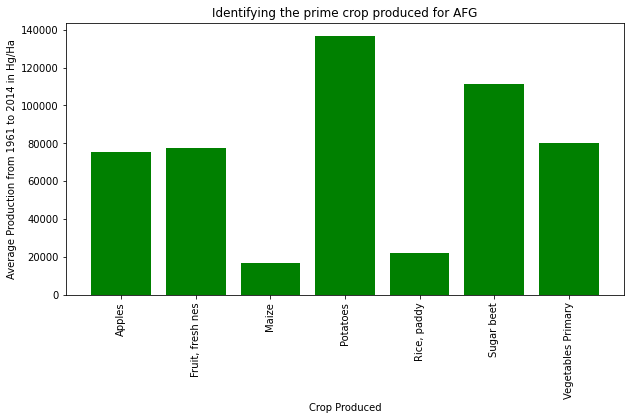

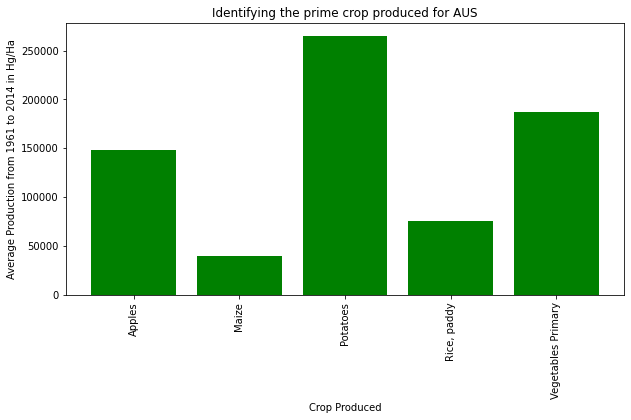

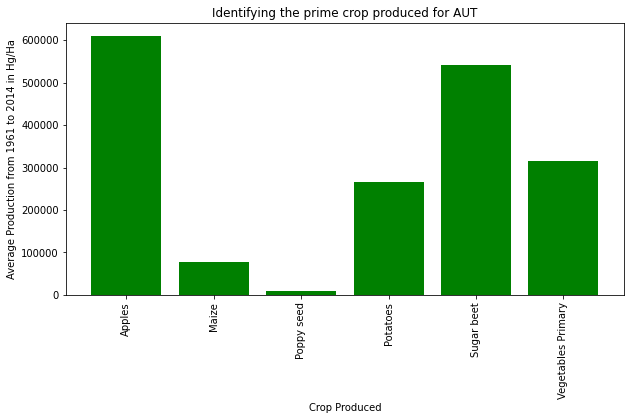

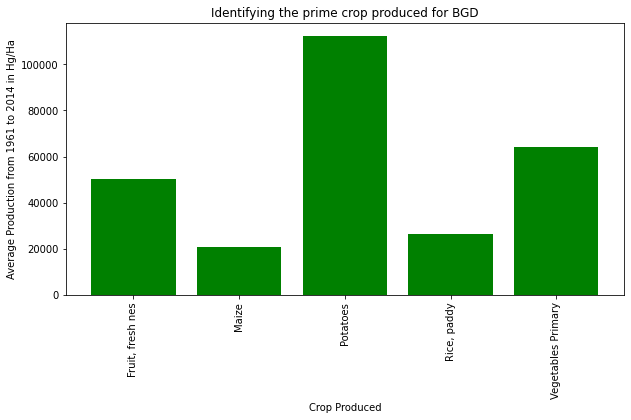

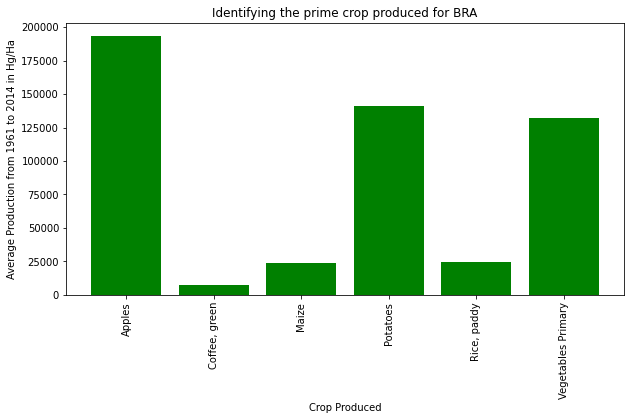

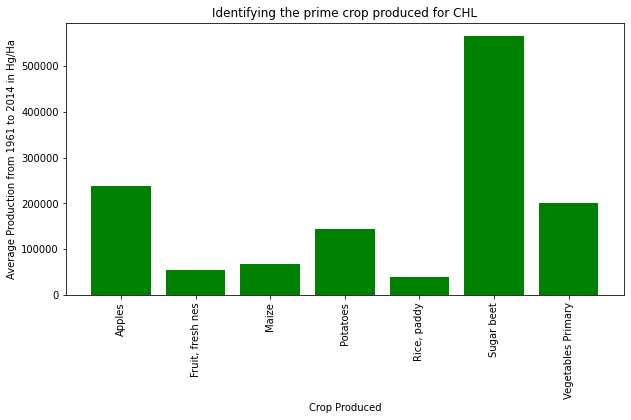

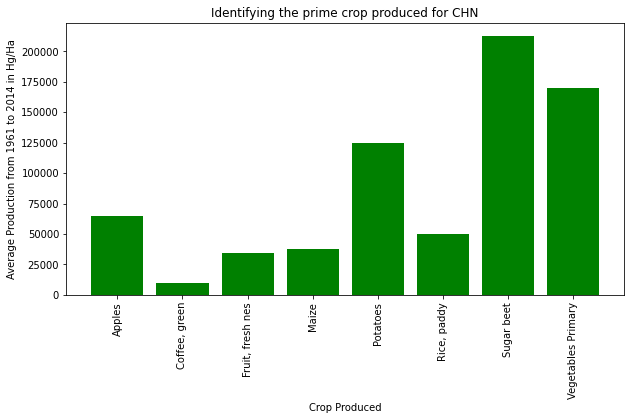

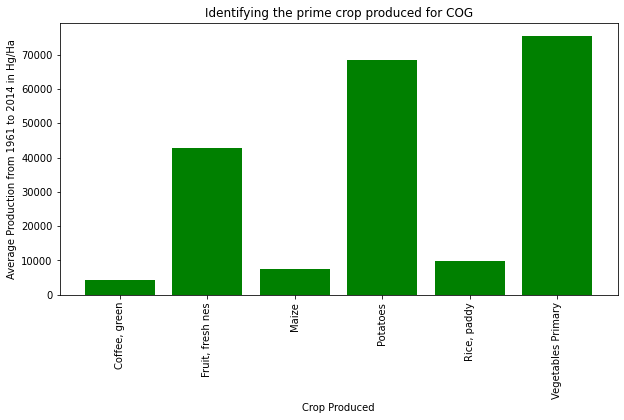

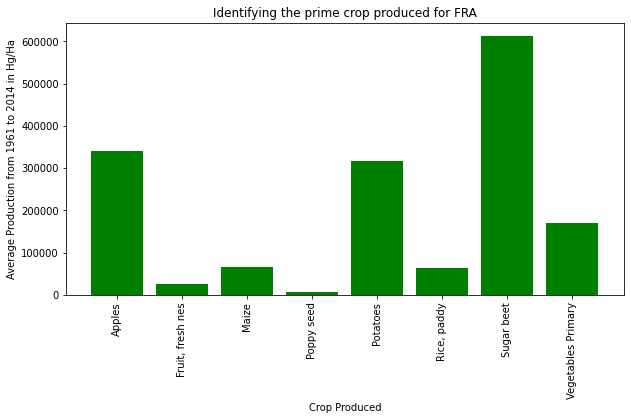

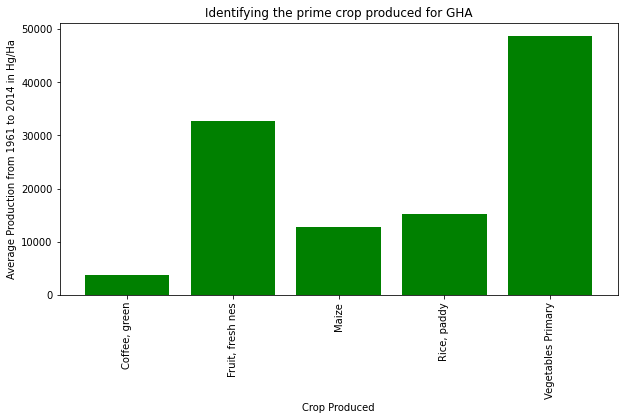

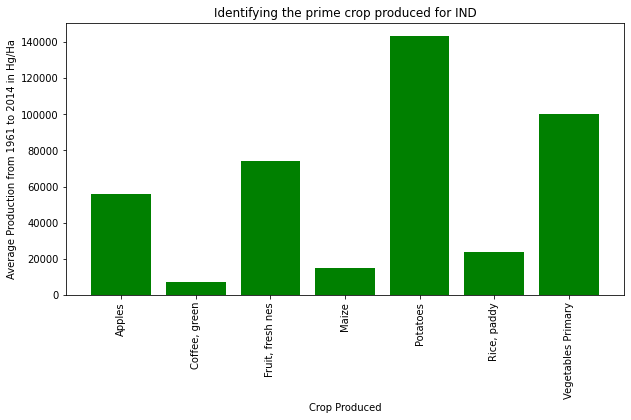

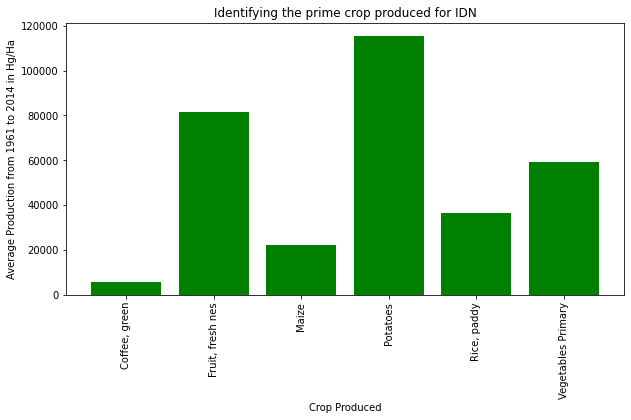

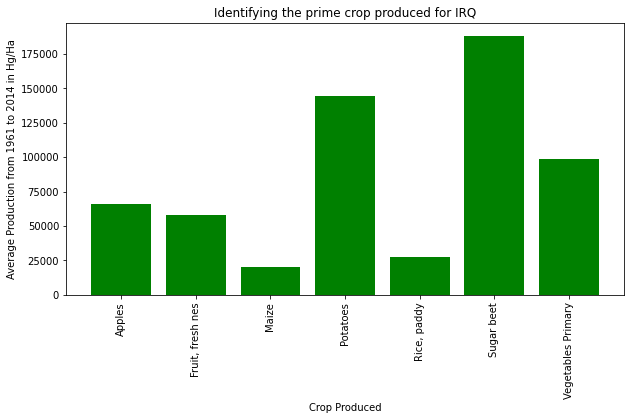

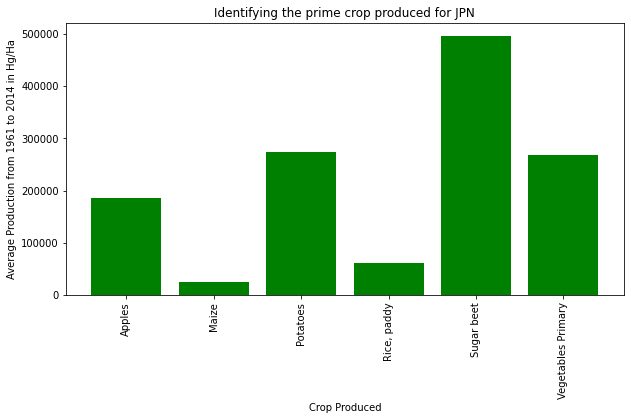

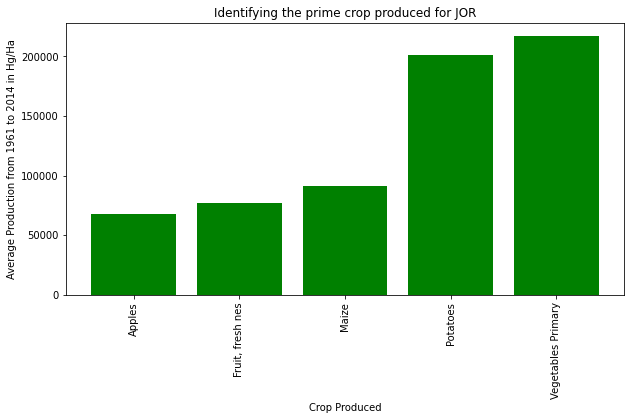

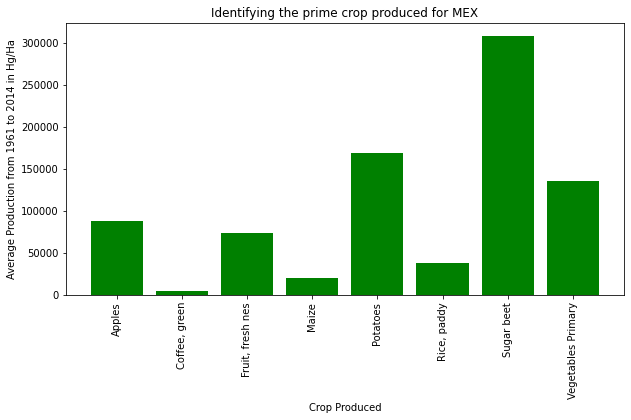

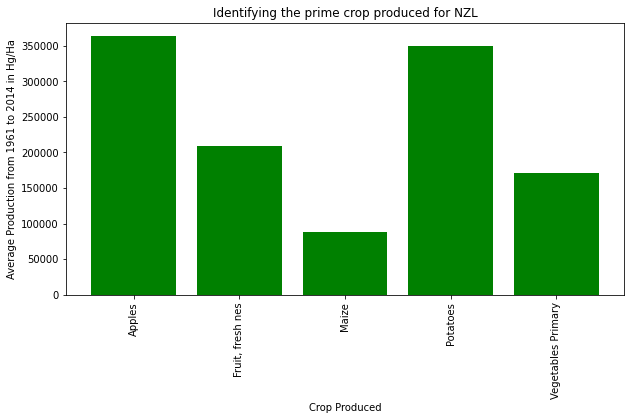

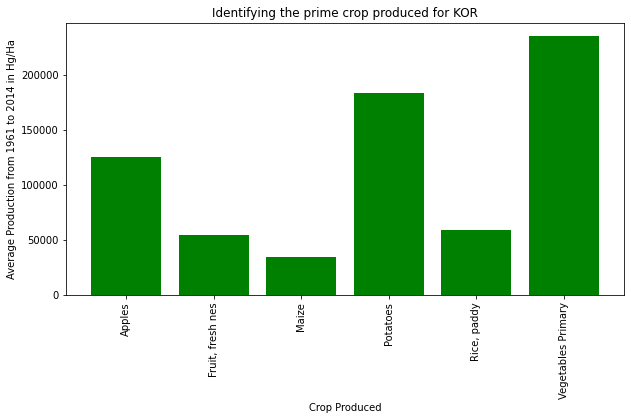

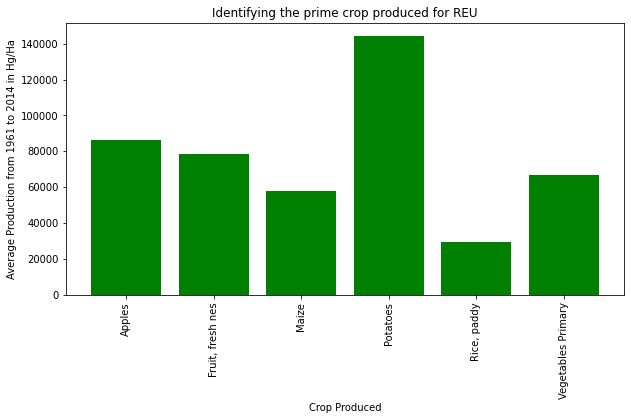

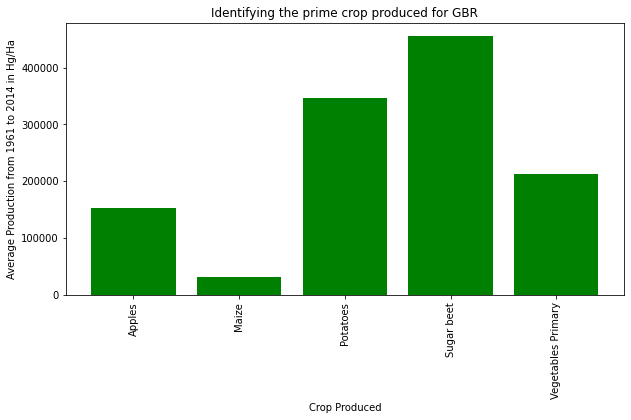

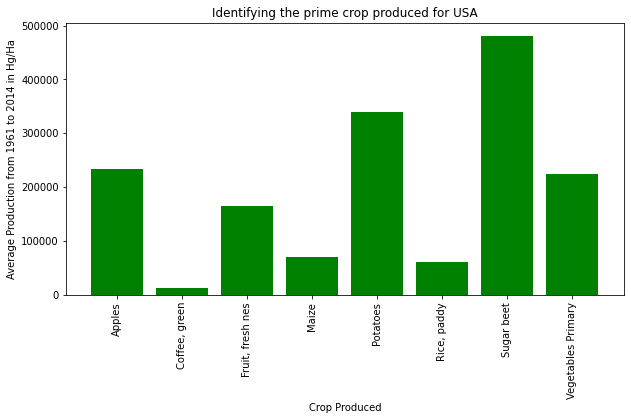

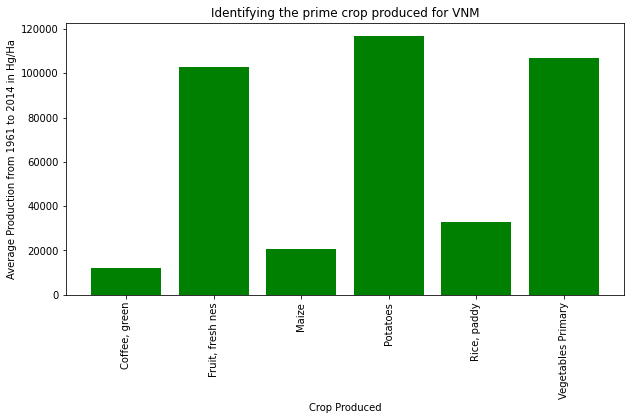

In [ ]:
for code in countryincludes:
  plotcountryfood(code)

+ `crop - production` vs `country` : to identify major producer of a crop

In [ ]:
#Creating a DF with the country , crop and average production columns
def plotfoodcountry(crop):
  
  countrydf = selectarea.loc[selectarea['typeName'] == crop]
  year_data = countrydf.columns[2:]
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
  countrydf['typeName'] = countrydf['typeName'].str.replace(r' yield in hg/ha', '')
  x = countrydf['code3']
  y = countrydf['Average Production']
  crop = crop.replace(r' yield in hg/ha', '')
  plt.title("Identifying the major producer of {}".format(crop)) 
  percent = 100.*y/y.sum()

  patches, texts = plt.pie(y, labels = x, startangle=90, radius=0.8)
  labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]

  sort_legend = True
  if sort_legend:
      patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                            key=lambda x: x[2],
                                            reverse=True))

  plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
            fontsize=8)
  plt.show() 
  #plt.savefig('piechart.png', bbox_inches='tight')

In [ ]:
for x in cropnames:
  plotfoodcountry(x)

NameError: ignored

+ `crop production` vs `total emission`

In [ ]:
#Creating a DF with the country , crop and average production columns
def plotemissioncrop(crop):
  plt.rcParams["figure.figsize"] = [16,9]
  df = selectemission.loc[selectemission['typeName'] == crop]
  #plotting a line graph for each country
  for code in df['code3']:
    country_df = df[df['code3'] == code]
    x = country_df.columns[2:]
    y = country_df[x].values.flatten().tolist()
    plt.plot(x, y, label=code)

  #plt = plt.figure(figsize = (10, 5))
  plt.legend(loc="upper right")
  crop = crop.replace('Emissions (CO2eq) gigagrams','')
  plt.ylabel("Emissions (CO2eq) gigagrams") 
  plt.title("Identifying trends in emmission for {}".format(crop)) 
  plt.xticks(rotation=90)
  plt.show() 


In [ ]:
crops_list = selectemission['typeName'].unique()
for crops in crops_list:
  plotemissioncrop(crops)

+ `yield` vs `total emission` : how yield and emissions are related. This is the focus area of our project.

In [ ]:
#Creating DF for cumulative yield

average_yield =[]
average_emmission = []
for code in countryincludes:
  countrydf = selectarea.loc[selectarea['code3'] == code]
  year_data = countrydf.columns[2:]
  countrydf['Average Production'] = countrydf[year_data].mean(axis = 1)
  mean = countrydf['Average Production'].mean(axis=0)
  average_yield.append(mean)
  emmission_df = cumemission[cumemission['code3'] == code]
  year_data = cumemission.columns[2:]
  emmission_df['Average Emmission'] = emmission_df[year_data].mean(axis = 1)
  avg = emmission_df['Average Emmission']
  average_emmission.append(float(avg))

cumulativeyield = pd.DataFrame(columns=['Country','average_yield','average_emmission'], data = list(zip(countryincludes, average_yield,average_emmission)))
#cumulativeyield  

In [ ]:
fig, ax = plt.subplots()
cumulativeyield.plot.bar(x='Country', ax=ax)

+ `crop production` vs `categorical emissions` : to see which emissions are how much correlated to crop production. can use heatmaps here.

In [ ]:
import matplotlib.cm as cmap

m = np.array([average_yield,average_emmission])
plt.imshow(m, cmap=cmap.hot)
plt.colorbar()
plt.show()

NameError: ignored